# Breast Cancer Classification Project

The project is to build a machine learning model to predict whether the tumor is benign or malignant basedon several observations/features.

![ribbon.png](ribbon.jpg)


We're going to take the following approach:
1. [Problem Definition](#definition)
2. [Data](#data) 
3. [Evaluation](#evaluation)
4. [Features](#features)
5. [Exploratory Data Analysis](#eda)
6. [Modelling](#modelling)
7. [Experimentation](#experimentation)

## <a name="definition">1. Problem Definition</a>

In a statement, 
> How well can we predict whether a tumor is benign or malignant basedon, given its several observations/features.

## <a name="data">2. Data</a>

Data: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## <a name="evaluation">3.Evaluation</a>

- TBC

## <a name="features">4.Features</a>

Attribute Information:

- 1) ID number
- 2) **Diagnosis (M = malignant, B = benign)**
- 3-32) Features

- Examples Features:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

# Load Data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
cancer = load_breast_cancer()

In [49]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
# check what kinf of keys we have
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
print(cancer['target_names'])

['malignant' 'benign']


In [13]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
cancer['data'].shape

(569, 30)

## Create dataframe

In [50]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

In [51]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


----

# <a name="eda">5. Exploratory Data Analysis</a>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [66]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [68]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

### check the balance of data

In [52]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

There are 357 Benign cases and 212 Magliant cases. We need to keep in mind that dataset is not that balanced.

In [53]:
357 / len(df), 211/ len(df)

(0.6274165202108963, 0.37082601054481545)

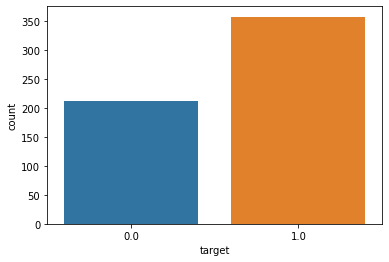

In [54]:
sns.countplot(data=df, x='target');

### Check quick relationship between some features


In [56]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

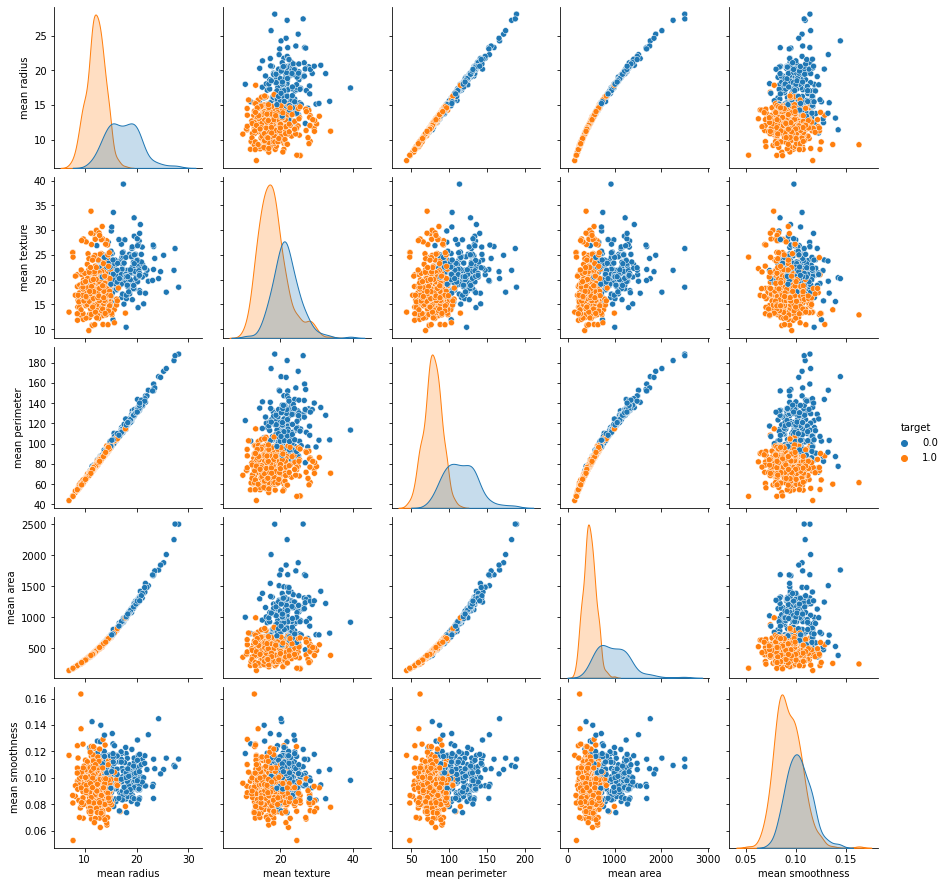

In [58]:
sns.pairplot(data=df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'], hue='target');

### Check the correlationship between features 

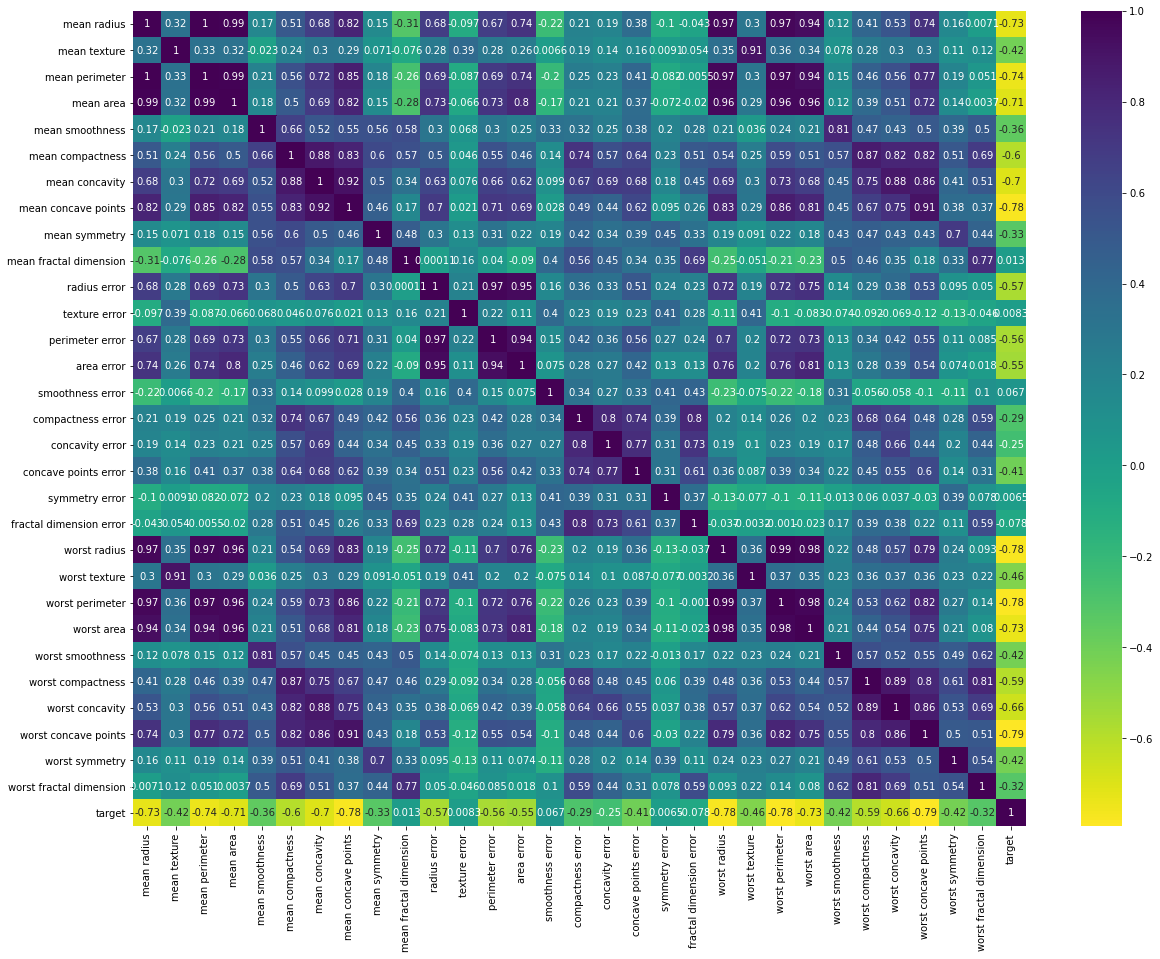

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis_r');

### check the correlationship of features and Target label

In [64]:
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

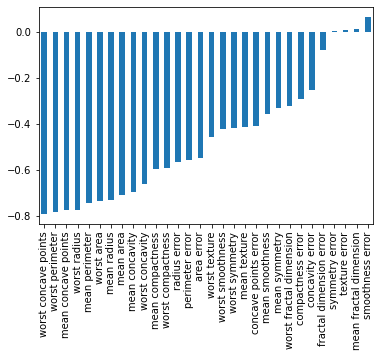

In [109]:
df.corr()['target'][:-1].sort_values().plot(kind='bar');

Seem like `smoothness error` has the highest positive correlationship with target lable. On the other hand, `worst concave points` has the highest negative correlationship with target.

--------

# <a name="modelling">6. Modelling</a>

## Train, Test and Split

In [95]:
# Separate Features and Labels
X = df.drop('target', axis=1)
y = df['target']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Model Training

In [99]:
from sklearn.svm import SVC

In [100]:
svc_model = SVC()

In [101]:
svc_model.fit(X_train, y_train)

SVC()

## Model Evaluation

In [102]:
y_preds = svc_model.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [104]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        43
         1.0       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



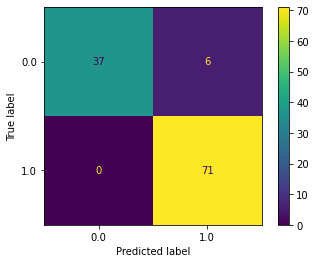

In [105]:
plot_confusion_matrix(svc_model, X_test, y_test);

There are 6 False Positive cases (Type I Error). 

We will try to improve on this.



----

# <a name="experimentation">7. Experimentation (Improving the model)</a>

# Data Normalization

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
# scaling
scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [124]:
# after scaling, as column names are removed. so we need to re-attach them
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.642376,...,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
1,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.505897,...,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
2,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.414280,...,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
3,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.280750,...,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
4,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.413648,...,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293


In [125]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
scaled_X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.234047,0.300643,0.235951,0.133657,0.424483,0.295939,0.187559,0.189911,0.404698,0.290017,...,0.229954,0.336354,0.211275,0.112718,0.485159,0.231175,0.213339,0.348797,0.285630,0.275178
1,0.550908,0.392289,0.538341,0.411739,0.338178,0.286008,0.253046,0.395179,0.221570,0.097936,...,0.591404,0.388060,0.566367,0.407503,0.326903,0.226562,0.214617,0.614777,0.194362,0.091980
2,0.380479,0.330402,0.382558,0.248219,0.510698,0.352442,0.343486,0.401938,0.407902,0.168492,...,0.386741,0.372601,0.357938,0.231342,0.566664,0.232932,0.302796,0.520275,0.250739,0.213208
3,0.230619,0.269530,0.238654,0.127607,0.476393,0.384289,0.181373,0.139115,0.343833,0.443555,...,0.153571,0.290245,0.178537,0.072499,0.501460,0.258739,0.191933,0.253265,0.195348,0.326806
4,0.188501,0.159959,0.190141,0.099760,0.426198,0.317170,0.157849,0.128926,0.347571,0.376158,...,0.130911,0.204158,0.123481,0.058108,0.430143,0.202622,0.143530,0.237732,0.150601,0.222957


In [127]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

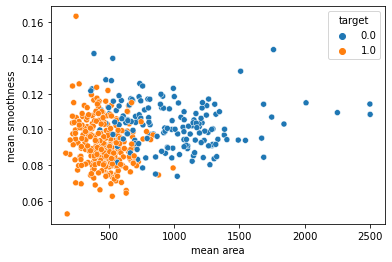

In [138]:
# Before Scaling
sns.scatterplot(data=X_train, x='mean area', y='mean smoothness', hue=y_train);

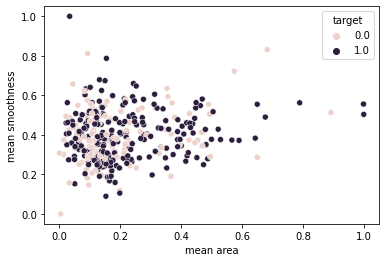

In [139]:
# After Scaling
sns.scatterplot(x=scaled_X_train['mean area'], y=scaled_X_train['mean smoothness'], hue=y_train);

## Model Training and Evaluation (Improvement Round)

In [140]:
svc_model.fit(scaled_X_train, y_train)

SVC()

In [142]:
y_preds = svc_model.predict(scaled_X_test)

In [143]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Our model's recall and F1-score are much balanced between the classes now. Accuracy is improved too.

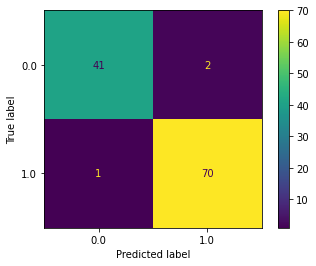

In [145]:
plot_confusion_matrix(svc_model, scaled_X_test, y_test);

We can see that improvement on our model. There are only 2 False Positive cases (Type I Error), reduced from 6.

However, we can see that there is 1 Fase Negative case which we want to avoid.

----------

# using Grid Search CV
To have more imporvment on our model, we will use GridSearchCV to find the best parameters, then use those to refit the model.

In [146]:
from sklearn.model_selection import GridSearchCV

In [163]:
# help(SVC)

In [164]:
# help(GridSearchCV)

In [176]:
parameters = {
    'C': [0.1, 1, 10, 50, 100, 150],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5, 6],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [177]:
grid_model = GridSearchCV(SVC(), parameters, cv=5, refit=True, verbose=4) # will refit the model based on based parameters found

In [178]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] C=0.1, degree=3, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=poly, score=0.637, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=rbf ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, degree=3, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=0.1, degree=3, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=poly, score=0.637, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=3, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=3, gamma=0

[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.593, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.582, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.505, total=   0.0s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=0.978, total=   0.0s
[CV] C=0.1, degree=3, gamma=10, kernel=poly .............

[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, score=0.681, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=4, gamma=0.1, kernel=poly, score=0.648, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.1, ker

[CV]  C=0.1, degree=5, gamma=0.001, kernel=poly, score=0.637, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=5, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.001, kernel=rb

[CV]  C=0.1, degree=5, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=5, gamma=10, kernel=poly, score=0.956, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=5, gamma=10, kernel=poly, score=0.978, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=5, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=rbf ...........................
[CV]  C=0.1, degree=5, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=rbf ...........................
[CV]  C=0.1, degree=5, gamma=10, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=rbf ...........................
[CV]  C=0.1, degree=5, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=5, gamma=10, kernel=rbf .......................

[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, score=0.824, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, score=0.758, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, score=0.802, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, score=0.791, total=   0.0s
[CV] C=0.1, degree=6, gamma=0.1, kernel=sigmoid ......................
[CV]  C=0.1, degree=6, gamma=0.1, kernel=sigmoid, score=0.769, total=   0.0s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=6, gamma=1, kernel=poly, score=0.956, total=   0.0s
[CV] C=0.1, degree=6, gamma=1, kernel=poly ..

[CV]  C=1, degree=3, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=3, gamma=0.001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=poly

[CV]  C=1, degree=3, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=10, kernel=sigmoid .........................
[CV]  C=1, degree=3, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=10, kernel=sigmoid .........................
[CV]  C=1, degree=3, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=3, gamma=10, kernel=sigmoid .........................
[CV]  C=1, degree=3, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=4, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=4, gamma=0.0001, kernel=poly, score=0.637, total=   0.0s
[CV] C=1, degree=4, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=4, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=4, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=4, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=4, gamma=0.0001, kernel=poly .......

[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, score=0.934, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, score=0.956, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=1, degree=4, gamma=0.1, kernel=sigmoid ........................
[CV]  C=1, degree=4, gamma=0.1, kernel=sigmoid, score=0.934, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly .............................
[CV] . C=1, degree=4, gamma=1, kernel=poly, score=0.956, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=poly ................

[CV]  C=1, degree=5, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=5, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=5, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=poly ..........................
[CV]  C=1, degree=5, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.912, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.901, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.945, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf .......................

[CV]  C=1, degree=6, gamma=0.0001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=rbf .........................
[CV]  C=1, degree=6, gamma=0.0001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=rbf .........................
[CV]  C=1, degree=6, gamma=0.0001, kernel=rbf, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=sigmoid .....................
[CV]  C=1, degree=6, gamma=0.0001, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=sigmoid .....................
[CV]  C=1, degree=6, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=sigmoid .....................
[CV]  C=1, degree=6, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel=sigmoid .....................
[CV]  C=1, degree=6, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=1, degree=6, gamma=0.0001, kernel

[CV]  C=1, degree=6, gamma=1, kernel=sigmoid, score=0.253, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, score=0.978, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=poly ............................
[CV]  C=1, degree=6, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................
[CV] . C=1, degree=6, gamma=10, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1, degree=6, gamma=10, kernel=rbf .............................
[CV]

[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=3, gamma=0.1, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=3, gamma=0.1, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=3, gamma=0.1, kernel=sigmoid, score=0.989, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=sigmoid ...........

[CV]  C=10, degree=4, gamma=0.001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=rbf .........................
[CV]  C=10, degree=4, gamma=0.001, kernel=rbf, score=0.890, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, score=0.846, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, score=0.769, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, score=0.824, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, score=0.835, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=sigmoid .....................
[CV]  C=10, degree=4, gamma=0.001, kernel=sigmoid, score=0.802, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, ker

[CV]  C=10, degree=4, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=rbf ............................
[CV]  C=10, degree=4, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=sigmoid ........................
[CV]  C=10, degree=4, gamma=10, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=sigmoid ........................
[CV]  C=10, degree=4, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=sigmoid ........................
[CV]  C=10, degree=4, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=sigmoid ........................
[CV]  C=10, degree=4, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=sigmoid ........................
[CV]  C=10, degree=4, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=poly ..........

[CV]  C=10, degree=5, gamma=0.1, kernel=sigmoid, score=0.989, total=   0.0s
[CV] C=10, degree=5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=5, gamma=0.1, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=10, degree=5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=10, degree=5, gamma=0.1, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV]  C=10, degree=5, gamma=1, kernel=poly, score=0.934, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV]  C=10, degree=5, gamma=1, kernel=poly, score=0.934, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV]  C=10, degree=5, gamma=1, kernel=poly, score=0.956, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV]  C=10, degree=5, gamma=1, kernel=poly, score=0.978, total=   0.0s
[CV] C=10, degree=5, gamma=1, kernel=poly ....................

[CV]  C=10, degree=6, gamma=0.01, kernel=rbf, score=0.956, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=6, gamma=0.01, kernel=rbf, score=0.956, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=6, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=6, gamma=0.01, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=6, gamma=0.01, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, degree=6, gamma=0.01, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=10, degree=6, gamma=0.01, kernel=sigmoid .......

[CV]  C=50, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=poly .......................
[CV]  C=50, degree=3, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=rbf ........................
[CV]  C=50, degree=3, gamma=0.0001, kernel=rbf, score=0.846, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=rbf ........................
[CV]  C=50, degree=3, gamma=0.0001, kernel=rbf, score=0.769, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=rbf ........................
[CV]  C=50, degree=3, gamma=0.0001, kernel=rbf, score=0.824, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=rbf ........................
[CV]  C=50, degree=3, gamma=0.0001, kernel=rbf, score=0.835, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=rbf ........................
[CV]  C=50, degree=3, gamma=0.0001, kernel=rbf, score=0.802, total=   0.0s
[CV] C=50, degree=3, gamma=0.0001, kernel=sigmo

[CV]  C=50, degree=3, gamma=1, kernel=poly, score=0.945, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=poly ............................
[CV]  C=50, degree=3, gamma=1, kernel=poly, score=0.934, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=poly ............................
[CV]  C=50, degree=3, gamma=1, kernel=poly, score=0.945, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=poly ............................
[CV]  C=50, degree=3, gamma=1, kernel=poly, score=0.978, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=poly ............................
[CV]  C=50, degree=3, gamma=1, kernel=poly, score=0.956, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=50, degree=3, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=50, degree=3, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=50, degree=3, gamma=1, kernel=rbf .............................
[CV] .

[CV]  C=50, degree=4, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=50, degree=4, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=50, degree=4, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=50, degree=4, gamma=0.01, kernel=rbf, score=0.989, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=50, degree=4, gamma=0.01, kernel=rbf, score=0.967, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=50, degree=4, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=50, degree=4, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=50, degree=4, gamma=0.01, kernel=rbf ................

[CV]  C=50, degree=5, gamma=0.0001, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=50, degree=5, gamma=0.0001, kernel=sigmoid ....................
[CV]  C=50, degree=5, gamma=0.0001, kernel=sigmoid, score=0.670, total=   0.0s
[CV] C=50, degree=5, gamma=0.0001, kernel=sigmoid ....................
[CV]  C=50, degree=5, gamma=0.0001, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=50, degree=5, gamma=0.0001, kernel=sigmoid ....................
[CV]  C=50, degree=5, gamma=0.0001, kernel=sigmoid, score=0.659, total=   0.0s
[CV] C=50, degree=5, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=5, gamma=0.001, kernel=poly, score=0.637, total=   0.0s
[CV] C=50, degree=5, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=5, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=5, gamma=0.001, kernel=poly, score=0.626, total=   0.0s
[CV] C=50, degree=5, gamma=0.001,

[CV]  C=50, degree=5, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=5, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=5, gamma=10, kernel=poly, score=0.956, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=5, gamma=10, kernel=poly, score=0.978, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=5, gamma=10, kernel=poly, score=0.945, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=rbf ............................
[CV]  C=50, degree=5, gamma=10, kernel=rbf, score=0.901, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=rbf ............................
[CV]  C=50, degree=5, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=50, degree=5, gamma=10, kernel=rbf ............................
[

[CV]  C=50, degree=6, gamma=0.1, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=50, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=50, degree=6, gamma=0.1, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=50, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=50, degree=6, gamma=0.1, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=50, degree=6, gamma=0.1, kernel=sigmoid .......................
[CV]  C=50, degree=6, gamma=0.1, kernel=sigmoid, score=0.956, total=   0.0s
[CV] C=50, degree=6, gamma=1, kernel=poly ............................
[CV]  C=50, degree=6, gamma=1, kernel=poly, score=0.934, total=   0.0s
[CV] C=50, degree=6, gamma=1, kernel=poly ............................
[CV]  C=50, degree=6, gamma=1, kernel=poly, score=0.934, total=   0.0s
[CV] C=50, degree=6, gamma=1, kernel=poly ............................
[CV]  C=50, degree=6, gamma=1, kernel=poly, score=0.945, total=   0.0s
[CV] C=50, degree=6, gamma=1, kernel=poly ...............

[CV]  C=100, degree=3, gamma=0.01, kernel=poly, score=0.670, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=3, gamma=0.01, kernel=poly, score=0.703, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=3, gamma=0.01, kernel=poly, score=0.637, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=poly ........................
[CV]  C=100, degree=3, gamma=0.01, kernel=poly, score=0.703, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.967, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.989, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .......

[CV]  C=100, degree=4, gamma=0.0001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=4, gamma=0.0001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=4, gamma=0.0001, kernel=rbf, score=0.890, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=4, gamma=0.0001, kernel=sigmoid, score=0.846, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=4, gamma=0.0001, kernel=sigmoid, score=0.769, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=4, gamma=0.0001, kernel=sigmoid, score=0.824, total=   0.0s
[CV] C=100, degree=4, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=4, gamma=0.0001, kernel=sigmoid, score=0.835, total=   0.0s
[CV] C=100, degree=4, gamm

[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=4, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, score=0.286, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, score=0.264, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, score=0.297, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ........................
[CV]  C=100, degree=4, gamma=1, kernel=sigmoid, score=0.286, total=   0.0s
[CV] C=100, degree=4, gamma=1, kernel=sigmoid ...............

[CV]  C=100, degree=5, gamma=0.01, kernel=rbf, score=0.978, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=5, gamma=0.01, kernel=rbf, score=0.967, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=5, gamma=0.01, kernel=sigmoid, score=0.989, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=5, gamma=0.01, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=5, gamma=0.01, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=5, gamma=0.01, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=100, degree=5, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, degree=5, gamma=0.01, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=100, degree=5, gamma=0.1, ker

[CV] C=100, degree=6, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=6, gamma=0.0001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=6, gamma=0.0001, kernel=rbf, score=0.890, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=6, gamma=0.0001, kernel=sigmoid, score=0.846, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=6, gamma=0.0001, kernel=sigmoid, score=0.769, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=6, gamma=0.0001, kernel=sigmoid, score=0.824, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=6, gamma=0.0001, kernel=sigmoid, score=0.835, total=   0.0s
[CV] C=100, degree=6, gamma=0.0001, kernel=sigmoid ...................
[CV]  C=100, degree=6, gamma=0.

[CV]  C=100, degree=6, gamma=10, kernel=poly, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, score=0.901, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=rbf ...........................
[CV]  C=100, degree=6, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=sigmoid .......................
[CV]  C=100, degree=6, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=100, degree=6, gamma=10, kernel=sigmoid ..................

[CV]  C=150, degree=3, gamma=0.1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=150, degree=3, gamma=0.1, kernel=sigmoid ......................
[CV]  C=150, degree=3, gamma=0.1, kernel=sigmoid, score=0.967, total=   0.0s
[CV] C=150, degree=3, gamma=0.1, kernel=sigmoid ......................
[CV]  C=150, degree=3, gamma=0.1, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=150, degree=3, gamma=0.1, kernel=sigmoid ......................
[CV]  C=150, degree=3, gamma=0.1, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=150, degree=3, gamma=0.1, kernel=sigmoid ......................
[CV]  C=150, degree=3, gamma=0.1, kernel=sigmoid, score=0.956, total=   0.0s
[CV] C=150, degree=3, gamma=0.1, kernel=sigmoid ......................
[CV]  C=150, degree=3, gamma=0.1, kernel=sigmoid, score=0.934, total=   0.0s
[CV] C=150, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=150, degree=3, gamma=1, kernel=poly, score=0.945, total=   0.0s
[CV] C=150, degree=3, gamma=1, kernel=poly .

[CV]  C=150, degree=4, gamma=0.001, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=150, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=150, degree=4, gamma=0.001, kernel=sigmoid, score=0.978, total=   0.0s
[CV] C=150, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=150, degree=4, gamma=0.001, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=150, degree=4, gamma=0.001, kernel=sigmoid ....................
[CV]  C=150, degree=4, gamma=0.001, kernel=sigmoid, score=0.945, total=   0.0s
[CV] C=150, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=150, degree=4, gamma=0.01, kernel=poly, score=0.637, total=   0.0s
[CV] C=150, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=150, degree=4, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=150, degree=4, gamma=0.01, kernel=poly ........................
[CV]  C=150, degree=4, gamma=0.01, kernel=poly, score=0.626, total=   0.0s
[CV] C=150, degree=4, gamma=0.01,

[CV]  C=150, degree=4, gamma=10, kernel=sigmoid, score=0.626, total=   0.0s
[CV] C=150, degree=4, gamma=10, kernel=sigmoid .......................
[CV]  C=150, degree=4, gamma=10, kernel=sigmoid, score=0.615, total=   0.0s
[CV] C=150, degree=4, gamma=10, kernel=sigmoid .......................
[CV]  C=150, degree=4, gamma=10, kernel=sigmoid, score=0.604, total=   0.0s
[CV] C=150, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=150, degree=5, gamma=0.0001, kernel=poly, score=0.637, total=   0.0s
[CV] C=150, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=150, degree=5, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=150, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=150, degree=5, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=150, degree=5, gamma=0.0001, kernel=poly ......................
[CV]  C=150, degree=5, gamma=0.0001, kernel=poly, score=0.626, total=   0.0s
[CV] C=150, degree=5, gamma=0.0001, ke

[CV]  C=150, degree=5, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=150, degree=5, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=150, degree=5, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=150, degree=5, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=sigmoid ........................
[CV]  C=150, degree=5, gamma=1, kernel=sigmoid, score=0.286, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=sigmoid ........................
[CV]  C=150, degree=5, gamma=1, kernel=sigmoid, score=0.264, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=sigmoid ........................
[CV]  C=150, degree=5, gamma=1, kernel=sigmoid, score=0.297, total=   0.0s
[CV] C=150, degree=5, gamma=1, kernel=sigmoid ...................

[CV]  C=150, degree=6, gamma=0.1, kernel=poly, score=0.901, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=150, degree=6, gamma=0.1, kernel=poly, score=0.945, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=150, degree=6, gamma=0.1, kernel=poly, score=0.945, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=150, degree=6, gamma=0.1, kernel=poly, score=0.901, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=rbf ..........................
[CV]  C=150, degree=6, gamma=0.1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=rbf ..........................
[CV]  C=150, degree=6, gamma=0.1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=rbf ..........................
[CV]  C=150, degree=6, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=150, degree=6, gamma=0.1, kernel=rbf ...............

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   31.3s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 150],
                         'degree': [3, 4, 5, 6],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=4)

In [180]:
# check the best parameters 
grid_model.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

## Model Evaluation

In [181]:
grid_predictions = grid_model.predict(scaled_X_test)

In [182]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



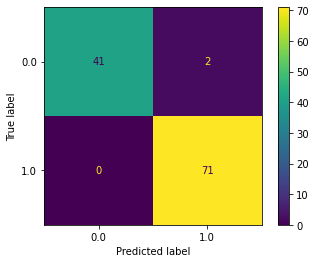

In [183]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test);

We can see that improvement on our model. 

There are still 2 False Positive cases, but no False negative cases.

---------

# using RandomizedSearchCV

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [191]:
parameters = {
    'C': stats.uniform(0.1, 10),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5, 6],
    'gamma': stats.uniform(0.1, 10)
}

In [192]:
rs_model = RandomizedSearchCV(SVC(), parameters, cv=5, refit=True, verbose=4) # will refit the model based on based parameters found

In [193]:
rs_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly 
[CV]  C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly, score=0.945, total=   0.0s
[CV] C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly 
[CV]  C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly, score=0.934, total=   0.0s
[CV] C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly 
[CV]  C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly, score=0.945, total=   0.0s
[CV] C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly 
[CV]  C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly, score=0.978, total=   0.0s
[CV] C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly 
[CV]  C=5.548459496066692, degree=3, gamma=7.5481474645908495, kernel=poly, score=0.956, total=   0.0s
[CV] C=2.1652176941243675, degree=4, gamma=1.4411

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly, score=0.934, total=   0.0s
[CV] C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly 
[CV]  C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly, score=0.945, total=   0.0s
[CV] C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly 
[CV]  C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly, score=0.978, total=   0.0s
[CV] C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly 
[CV]  C=2.9289819266897985, degree=4, gamma=3.2338286382616332, kernel=poly, score=0.934, total=   0.0s
[CV] C=6.545094688722912, degree=4, gamma=8.53152689537018, kernel=sigmoid 
[CV]  C=6.545094688722912, degree=4, gamma=8.53152689537018, kernel=sigmoid, score=0.637, total=   0.0s
[CV] C=6.545094688722912, degree=4, gamma=8.53152689537018, kernel=sigmoid 
[CV]  C=6.545094688722912, degree=4, gamma=8.53152689537018, kernel=sigmoid, score=0.626, total=   0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000096D5EC0E20>,
                                        'degree': [3, 4, 5, 6],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000096D5EC0910>,
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=4)

In [194]:
rs_model.best_params_

{'C': 2.1652176941243675,
 'degree': 4,
 'gamma': 1.441179258768931,
 'kernel': 'rbf'}

## Model Evaluation

In [195]:
rs_predictions = rs_model.predict(scaled_X_test)

In [198]:
print(classification_report(y_test, rs_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



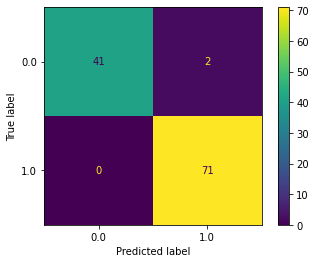

In [199]:
plot_confusion_matrix(rs_model, scaled_X_test, y_test);

### Conclusion:
The predictions result using GridSearchCV and RandomizedSearchCV yield the same results. So We can either choose one of those as final model.

However, if we want to achieve more imporvements,  we might want to puruse Computer Vision/ML techniques.